# Long Short-Term Memory

In [1]:
DATASET_FILE = "../output/data/dataset.joblib"
OUTPUT_PATH = "../output/data/lstm"

TRAIN_RATIO = 0.70
VAL_RATIO = 0.20
TEST_RATIO = 0.10
RANDOM_STATE = 42

In [2]:
from keras import models, layers, optimizers, callbacks
from matplotlib import font_manager, pyplot as plt
from joblib import load
from pathlib import Path
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from dataset_type import Dataset
import numpy as np

font_prop = font_manager.FontProperties(fname="../submodules/sarabun-font/fonts/Sarabun-Regular.ttf")

2025-03-24 12:39:40.736992: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 12:39:40.748666: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742794780.762187   73105 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742794780.766023   73105 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742794780.776372   73105 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [3]:
DATASET_FILE = Path(DATASET_FILE).resolve()
OUTPUT_PATH = Path(OUTPUT_PATH).resolve()
OUTPUT_PATH.mkdir(parents=True, exist_ok=True)

assert DATASET_FILE.is_file()

In [4]:
datasets: dict[str, Dataset] = load(DATASET_FILE)
results: dict[str, float | int] = []

In [5]:
def create_sequences(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i + seq_len])
        y_seq.append(y[i + seq_len])

    return np.array(X_seq), np.array(y_seq)

Sequence Length: 1


I0000 00:00:1742794783.565335   73105 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2062 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/100


I0000 00:00:1742794786.148419   73245 service.cc:152] XLA service 0x3e07c3e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742794786.148433   73245 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-03-24 12:39:46.198536: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742794786.615758   73245 cuda_dnn.cc:529] Loaded cuDNN version 90300


113/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.1642 - mae: 3.2176

I0000 00:00:1742794788.824444   73245 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


350/350 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 8.9230 - mae: 1.8591 - val_loss: 0.8155 - val_mae: 0.7188
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9958 - mae: 0.7633 - val_loss: 0.9727 - val_mae: 0.7983
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0671 - mae: 0.7757 - val_loss: 0.7182 - val_mae: 0.6145
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9310 - mae: 0.7342 - val_loss: 0.7820 - val_mae: 0.6959
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9443 - mae: 0.7405 - val_loss: 0.9010 - val_mae: 0.7598
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0249 - mae: 0.7717 - val_loss: 0.7820 - val_mae: 0.6618
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9047 - mae: 0.7201 - val_loss: 0.7141 - val_mae: 0.6533
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9749 - mae: 0.7465 - val_loss: 0.6923 - val_mae: 0.6197
Epoch 9/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss

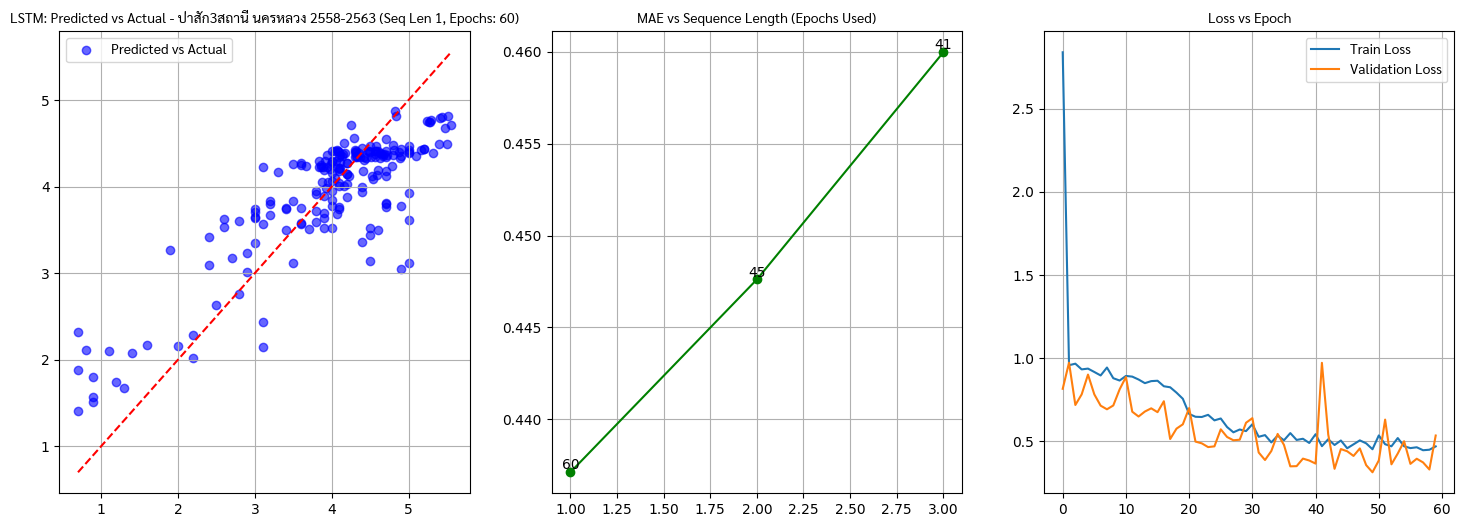

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.3115 - mae: 1.3981 - val_loss: 0.2743 - val_mae: 0.3989
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3785 - mae: 0.4901 - val_loss: 0.2801 - val_mae: 0.4032
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3723 - mae: 0.4907 - val_loss: 0.7157 - val_mae: 0.7467
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3784 - mae: 0.4886 - val_loss: 0.7341 - val_mae: 0.7222
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4086 - mae: 0.5229 - val_loss: 0.2795 - val_mae: 0.4045
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3608 - mae: 0.4792 - val_loss: 0.3489 - val_mae: 0.4663
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3367 - mae: 0.4597 - val_loss: 0.4413 - val_mae: 0.5272
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3781 - mae: 0.4975 - val_loss: 0.4578 - val_mae: 0.5497
Epoch 9/100
350/350 ━━━━━━━━━

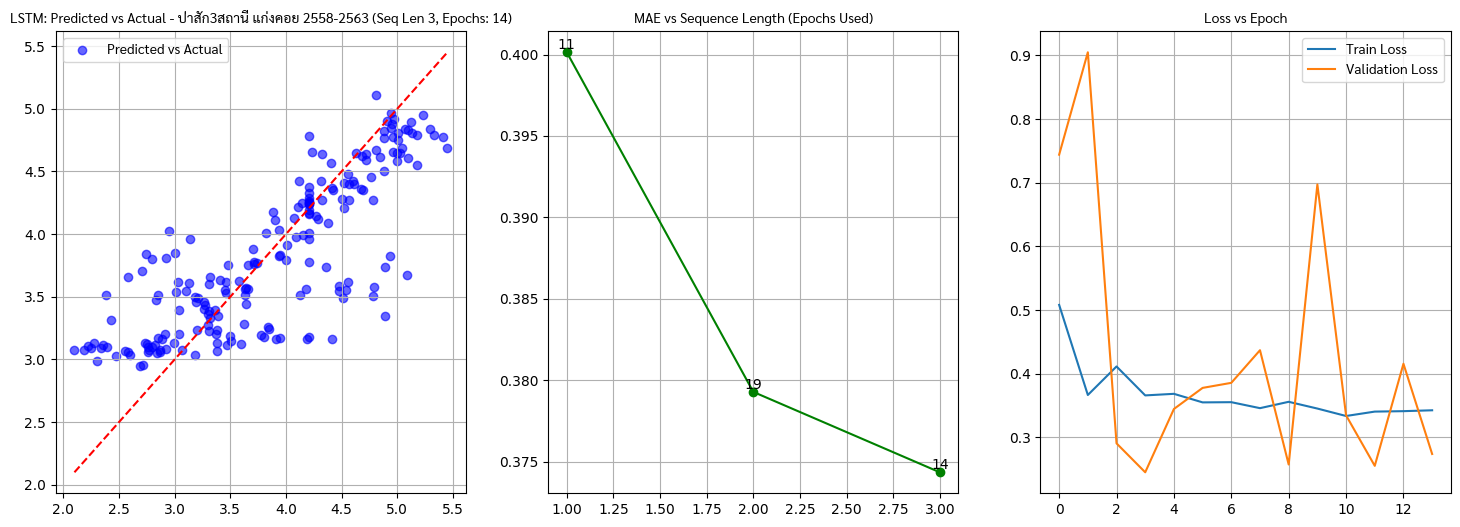

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 2.8137 - mae: 0.8963 - val_loss: 0.5758 - val_mae: 0.4457
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5034 - mae: 0.4493 - val_loss: 0.4476 - val_mae: 0.4768
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5712 - mae: 0.4880 - val_loss: 0.4001 - val_mae: 0.4169
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5736 - mae: 0.4549 - val_loss: 0.4713 - val_mae: 0.4355
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5729 - mae: 0.4562 - val_loss: 0.3706 - val_mae: 0.3670
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5265 - mae: 0.4418 - val_loss: 0.3671 - val_mae: 0.3722
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5138 - mae: 0.4327 - val_loss: 0.3649 - val_mae: 0.3642
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4713 - mae: 0.4214 - val_loss: 0.4282 - val_mae: 0.3966
Epoch 9/100
350/350 ━━━━━━━━━

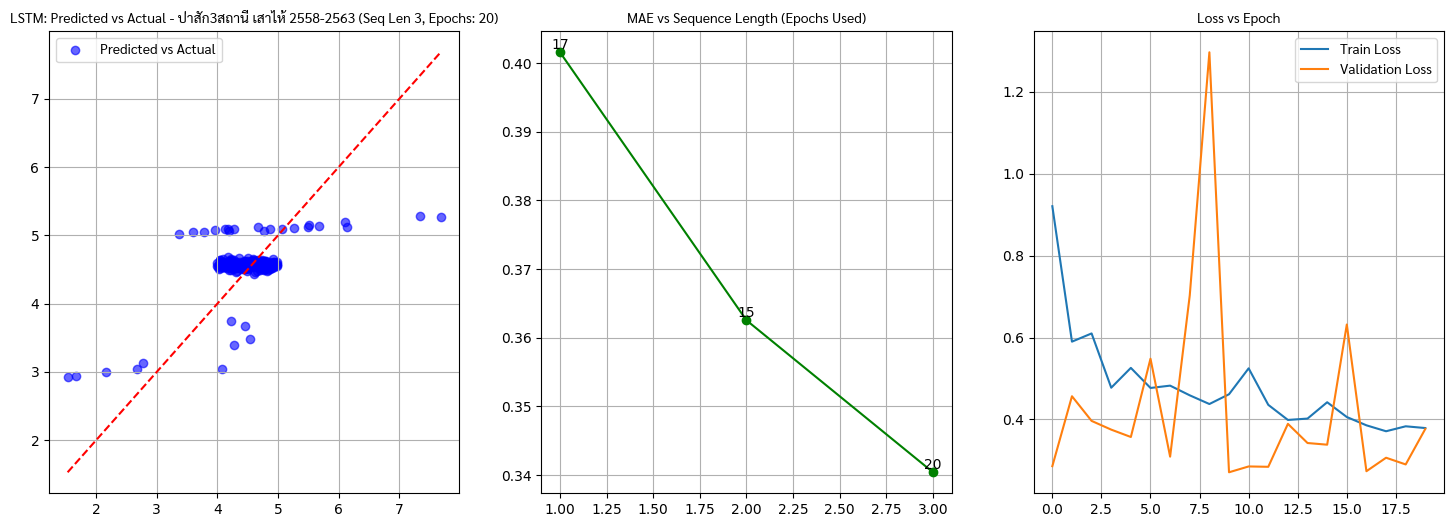

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7.1201 - mae: 1.9172 - val_loss: 4.7263 - val_mae: 1.5682
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0551 - mae: 1.3082 - val_loss: 2.2155 - val_mae: 1.0788
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9044 - mae: 1.1588 - val_loss: 2.1896 - val_mae: 0.9257
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4449 - mae: 1.0737 - val_loss: 2.3071 - val_mae: 0.9928
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3236 - mae: 1.0303 - val_loss: 2.8575 - val_mae: 1.0537
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5332 - mae: 1.1237 - val_loss: 2.0855 - val_mae: 1.1297
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2370 - mae: 1.0428 - val_loss: 3.1904 - val_mae: 1.1458
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4172 - mae: 1.0549 - val_loss: 2.1992 - val_mae: 0.8362
Epoch 9/100
350/350 ━━━━━━━━━

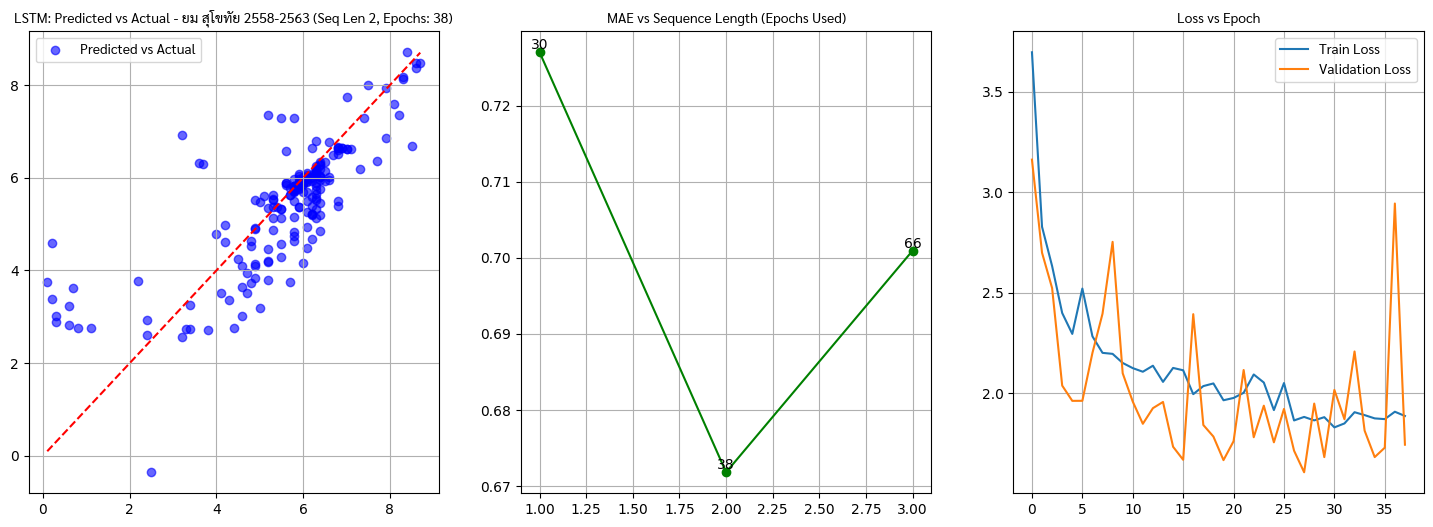

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 8.9061 - mae: 2.4409 - val_loss: 6.7538 - val_mae: 2.2617
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4697 - mae: 1.8408 - val_loss: 3.9866 - val_mae: 1.7737
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0898 - mae: 1.4370 - val_loss: 2.8864 - val_mae: 1.4640
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4926 - mae: 1.1761 - val_loss: 2.1154 - val_mae: 0.9844
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0153 - mae: 1.0441 - val_loss: 1.9048 - val_mae: 0.9257
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7958 - mae: 0.9570 - val_loss: 1.4586 - val_mae: 0.8210
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2296 - mae: 1.0328 - val_loss: 1.3924 - val_mae: 0.8664
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8063 - mae: 0.9412 - val_loss: 1.6784 - val_mae: 0.9918
Epoch 9/100
350/350 ━━━━━━━━━

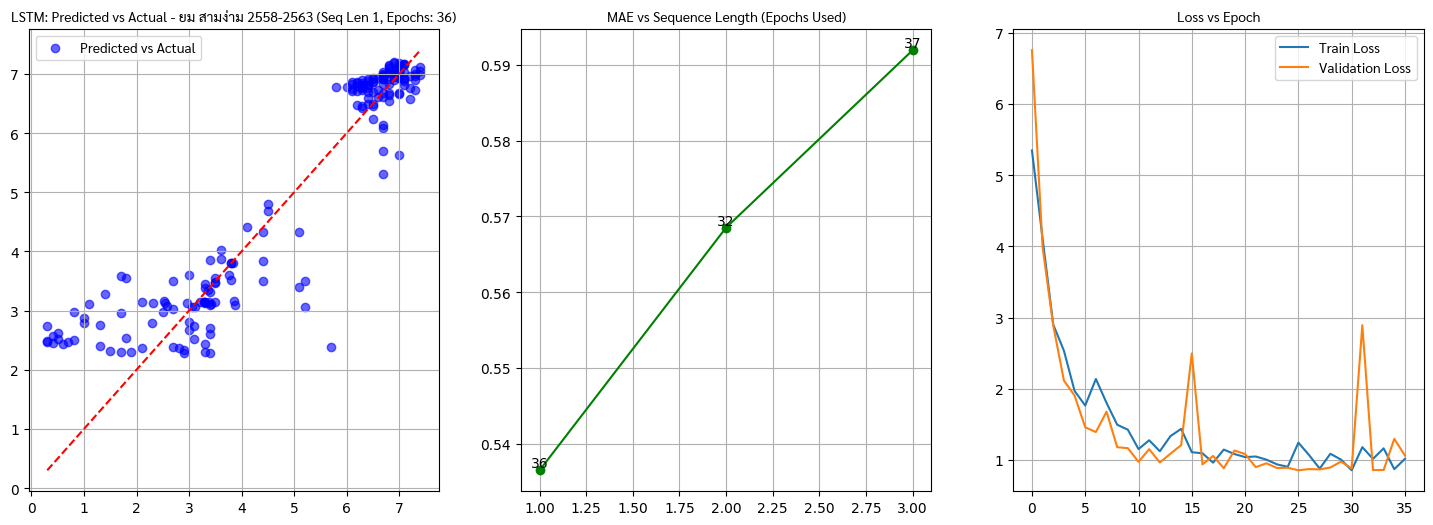

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.1682 - mae: 1.0549 - val_loss: 0.5029 - val_mae: 0.5566
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5564 - mae: 0.5987 - val_loss: 0.5795 - val_mae: 0.6378
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7168 - mae: 0.6830 - val_loss: 0.4777 - val_mae: 0.5361
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5175 - mae: 0.5792 - val_loss: 0.4055 - val_mae: 0.5097
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5019 - mae: 0.5635 - val_loss: 0.3549 - val_mae: 0.4735
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4130 - mae: 0.5125 - val_loss: 0.4388 - val_mae: 0.5322
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4786 - mae: 0.5479 - val_loss: 0.3675 - val_mae: 0.4701
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4640 - mae: 0.5428 - val_loss: 0.3061 - val_mae: 0.4730
Epoch 9/100
350/350 ━━━━━━━━━

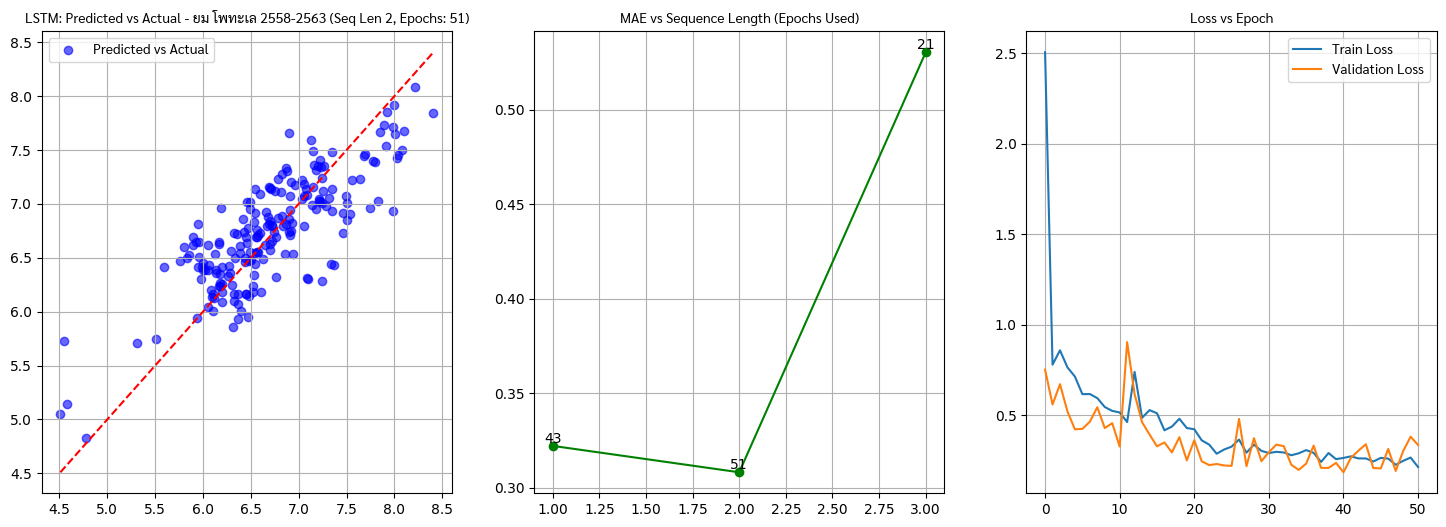

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 15.3003 - mae: 2.5834 - val_loss: 2.5492 - val_mae: 1.3195
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7604 - mae: 1.3726 - val_loss: 2.5048 - val_mae: 1.3302
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6154 - mae: 1.3492 - val_loss: 2.4925 - val_mae: 1.3117
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5803 - mae: 1.3283 - val_loss: 2.5649 - val_mae: 1.3162
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5671 - mae: 1.3324 - val_loss: 2.6312 - val_mae: 1.3633
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7025 - mae: 1.3600 - val_loss: 2.4954 - val_mae: 1.3252
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7876 - mae: 1.3856 - val_loss: 2.7189 - val_mae: 1.3437
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6281 - mae: 1.3632 - val_loss: 2.4373 - val_mae: 1.3109
Epoch 9/100
350/350 ━━━━━━━━

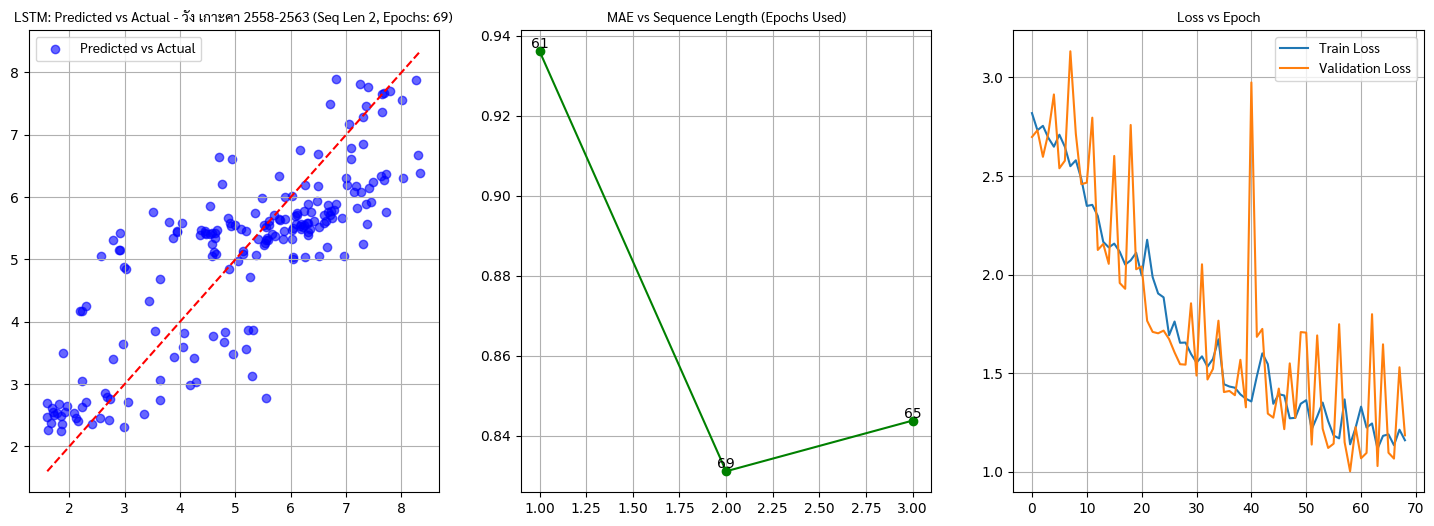

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0485 - mae: 0.1591 - val_loss: 0.0284 - val_mae: 0.1397
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0387 - mae: 0.1504 - val_loss: 0.0254 - val_mae: 0.1113
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0350 - mae: 0.1377 - val_loss: 0.0260 - val_mae: 0.1270
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0317 - mae: 0.1362 - val_loss: 0.0341 - val_mae: 0.1586
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0299 - mae: 0.1276 - val_loss: 0.0279 - val_mae: 0.1359
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0293 - mae: 0.1265 - val_loss: 0.0274 - val_mae: 0.1330
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0327 - mae: 0.1358 - val_loss: 0.0270 - val_mae: 0.1309
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0306 - mae: 0.1295 - val_loss: 0.0294 - val_mae: 0.1416
Epoch 9/100
350/350 ━━━━━━━━━

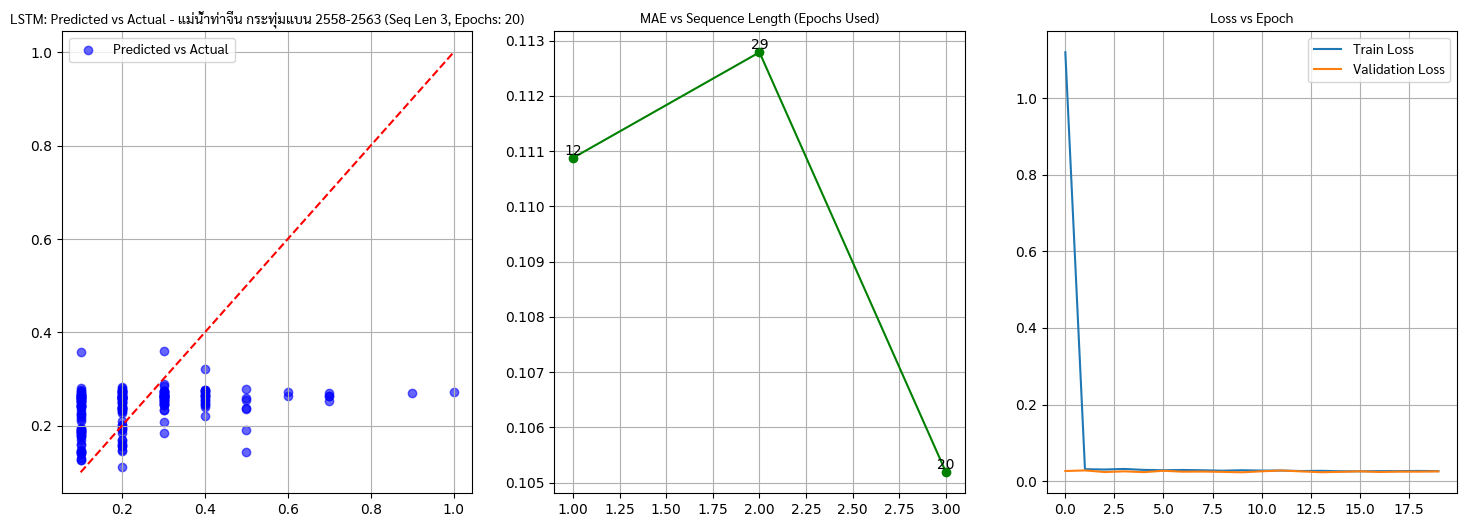

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.9035 - mae: 0.5372 - val_loss: 0.2603 - val_mae: 0.4540
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1835 - mae: 0.3029 - val_loss: 0.0552 - val_mae: 0.1714
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1331 - mae: 0.2657 - val_loss: 0.1435 - val_mae: 0.3271
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1692 - mae: 0.3089 - val_loss: 0.0538 - val_mae: 0.1858
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0871 - mae: 0.2317 - val_loss: 0.2134 - val_mae: 0.4167
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1036 - mae: 0.2566 - val_loss: 0.1211 - val_mae: 0.2980
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1184 - mae: 0.2596 - val_loss: 0.0545 - val_mae: 0.1734
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0771 - mae: 0.2027 - val_loss: 0.0786 - val_mae: 0.2365
Epoch 9/100
350/350 ━━━━━━━━━

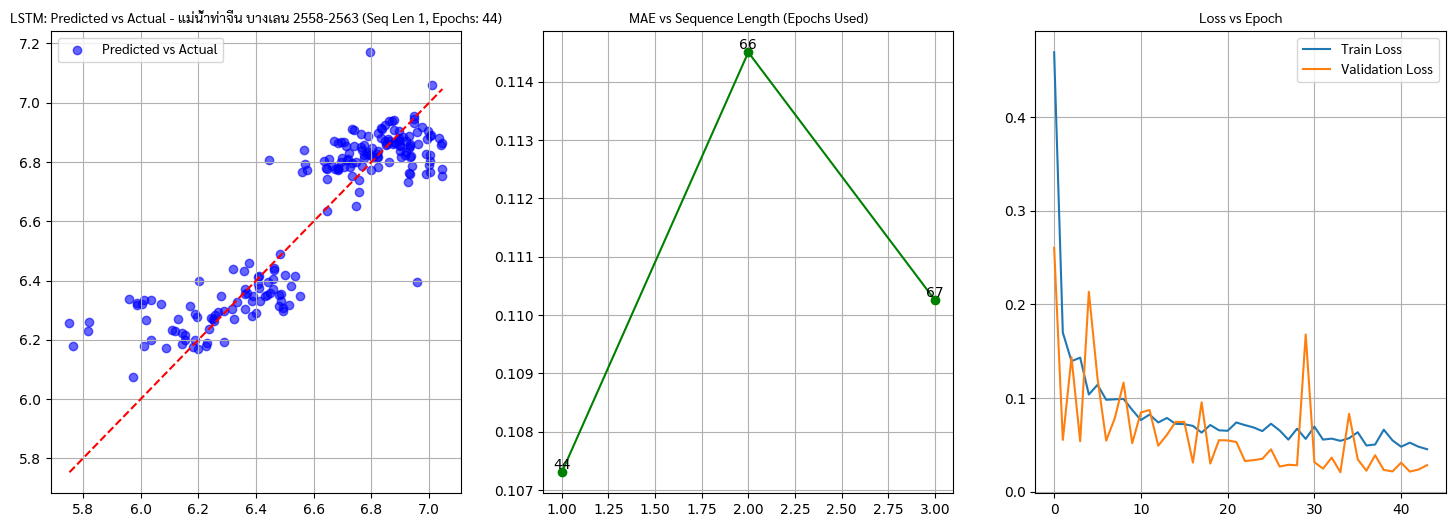

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.8793 - mae: 0.5590 - val_loss: 0.1317 - val_mae: 0.3114
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1371 - mae: 0.3010 - val_loss: 0.1047 - val_mae: 0.2755
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1316 - mae: 0.2944 - val_loss: 0.1095 - val_mae: 0.2772
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1245 - mae: 0.2913 - val_loss: 0.1159 - val_mae: 0.2898
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1267 - mae: 0.2895 - val_loss: 0.1051 - val_mae: 0.2700
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1248 - mae: 0.2916 - val_loss: 0.1068 - val_mae: 0.2702
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1104 - mae: 0.2701 - val_loss: 0.1462 - val_mae: 0.3120
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1176 - mae: 0.2815 - val_loss: 0.1717 - val_mae: 0.3317
Epoch 9/100
350/350 ━━━━━━━━━

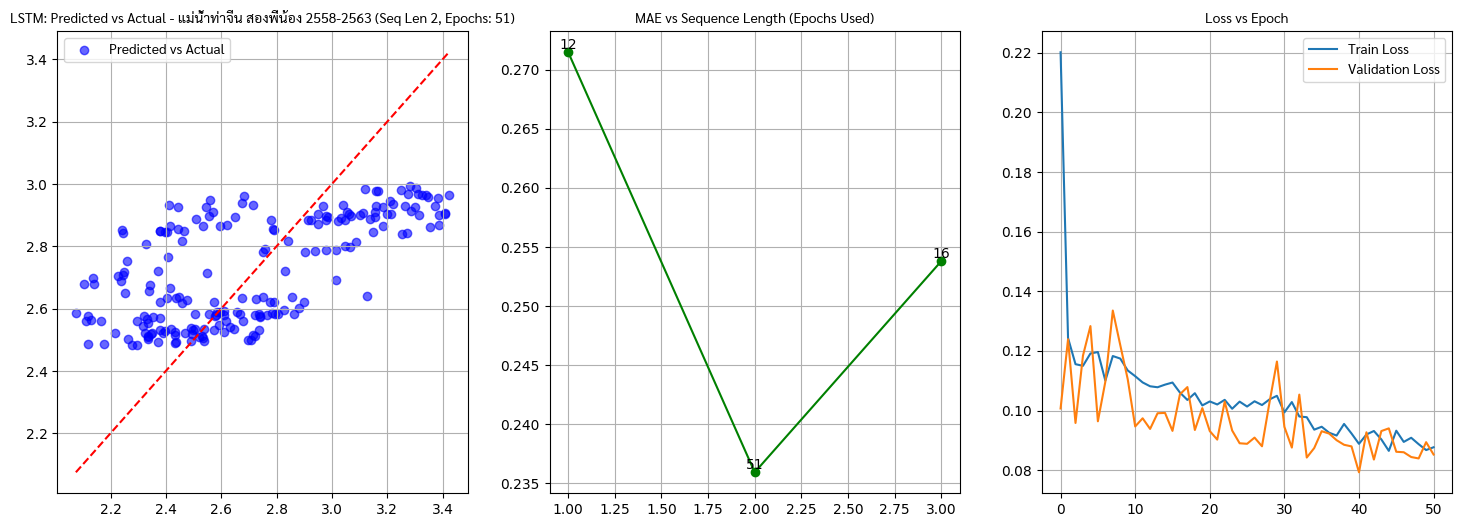

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.2662 - mae: 0.7801 - val_loss: 0.5859 - val_mae: 0.6189
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7250 - mae: 0.6903 - val_loss: 0.5913 - val_mae: 0.5987
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6512 - mae: 0.6444 - val_loss: 0.5918 - val_mae: 0.5987
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6062 - mae: 0.6165 - val_loss: 0.7544 - val_mae: 0.6480
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6550 - mae: 0.6412 - val_loss: 0.6333 - val_mae: 0.6058
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6966 - mae: 0.6672 - val_loss: 0.6268 - val_mae: 0.6523
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6754 - mae: 0.6547 - val_loss: 0.6017 - val_mae: 0.6393
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6505 - mae: 0.6453 - val_loss: 0.7247 - val_mae: 0.6373
Epoch 9/100
350/350 ━━━━━━━━━

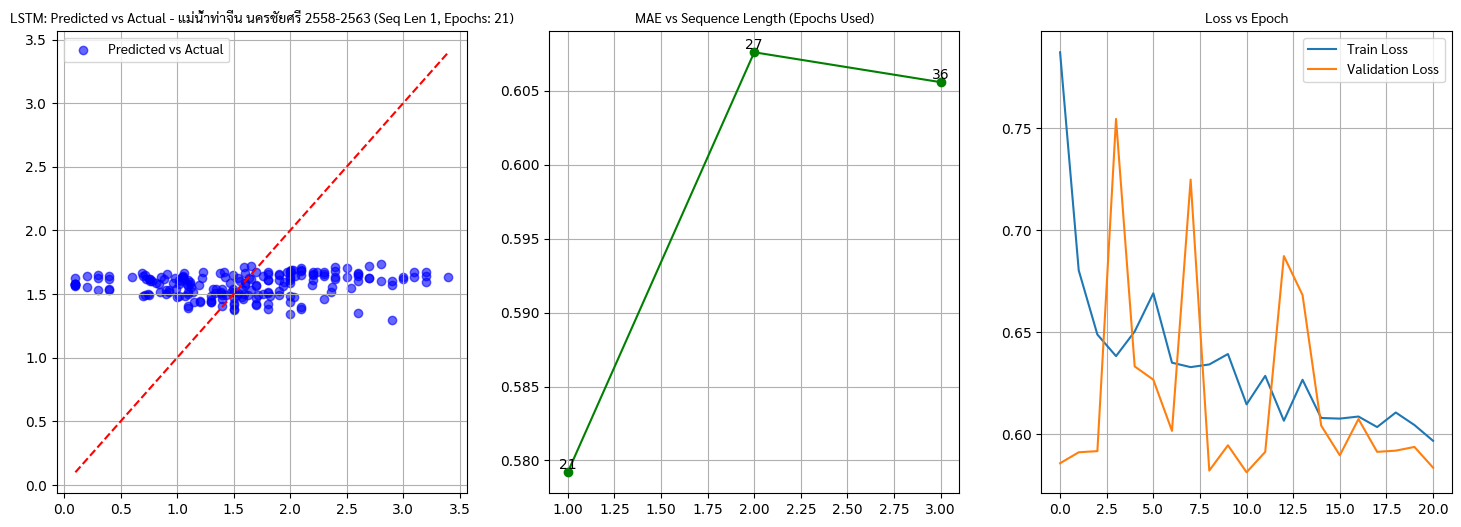

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 11.1695 - mae: 1.9715 - val_loss: 0.1535 - val_mae: 0.3335
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1377 - mae: 0.3006 - val_loss: 0.1310 - val_mae: 0.3012
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1251 - mae: 0.2853 - val_loss: 0.1330 - val_mae: 0.2823
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1276 - mae: 0.2879 - val_loss: 0.1253 - val_mae: 0.2861
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1328 - mae: 0.2952 - val_loss: 0.1128 - val_mae: 0.2678
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1181 - mae: 0.2742 - val_loss: 0.1346 - val_mae: 0.2800
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1309 - mae: 0.2924 - val_loss: 0.1944 - val_mae: 0.3808
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1230 - mae: 0.2836 - val_loss: 0.1182 - val_mae: 0.2775
Epoch 9/100
350/350 ━━━━━━━━

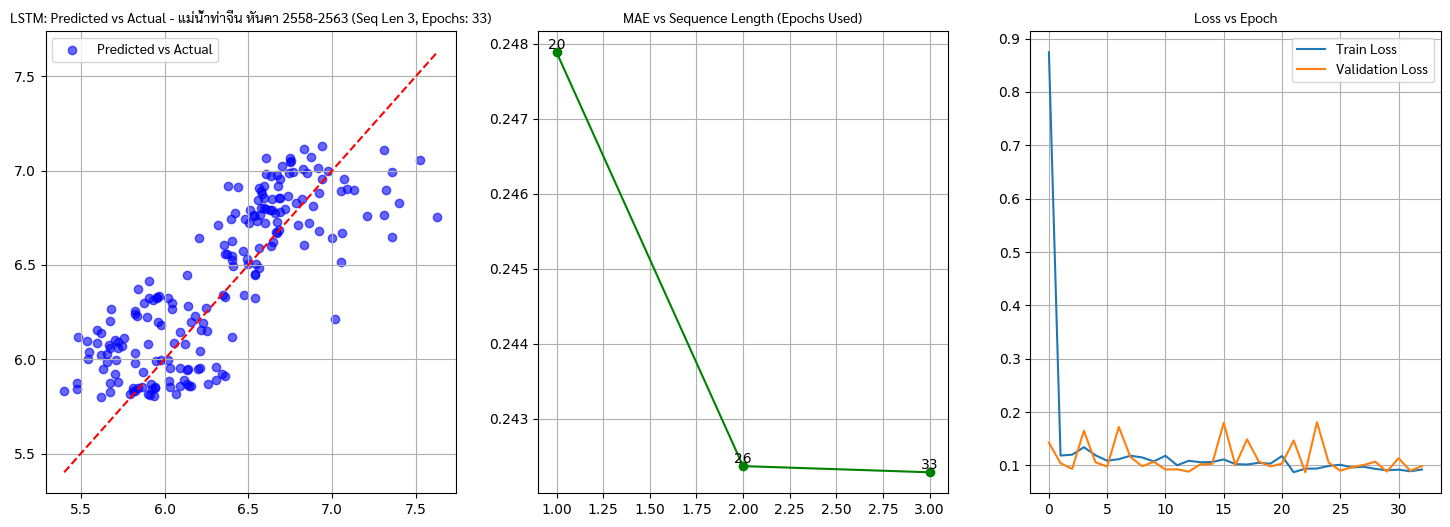

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.2157 - mae: 0.7147 - val_loss: 0.2680 - val_mae: 0.4309
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2771 - mae: 0.4329 - val_loss: 0.2783 - val_mae: 0.4527
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2878 - mae: 0.4417 - val_loss: 0.2739 - val_mae: 0.3914
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3018 - mae: 0.4433 - val_loss: 0.2667 - val_mae: 0.4235
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2622 - mae: 0.4187 - val_loss: 0.2878 - val_mae: 0.4689
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2861 - mae: 0.4468 - val_loss: 0.2869 - val_mae: 0.4676
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2805 - mae: 0.4375 - val_loss: 0.2653 - val_mae: 0.4143
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3109 - mae: 0.4600 - val_loss: 0.2801 - val_mae: 0.4576
Epoch 9/100
350/350 ━━━━━━━━━

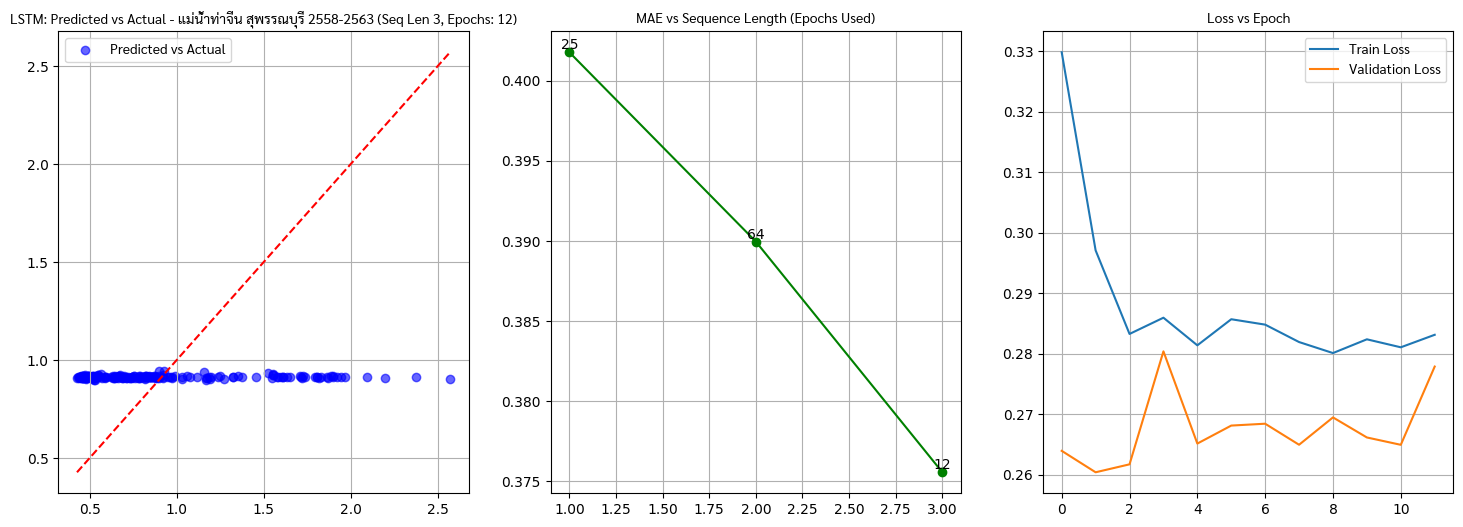

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 23.5139 - mae: 2.6452 - val_loss: 0.6580 - val_mae: 0.6365
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5935 - mae: 0.6122 - val_loss: 0.5592 - val_mae: 0.5934
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6818 - mae: 0.6690 - val_loss: 0.6708 - val_mae: 0.6852
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6449 - mae: 0.6450 - val_loss: 0.6099 - val_mae: 0.6208
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5805 - mae: 0.6148 - val_loss: 0.5558 - val_mae: 0.6112
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7736 - mae: 0.6526 - val_loss: 0.5421 - val_mae: 0.5850
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5767 - mae: 0.6186 - val_loss: 0.5986 - val_mae: 0.6286
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5989 - mae: 0.6281 - val_loss: 0.6016 - val_mae: 0.6136
Epoch 9/100
350/350 ━━━━━━━━

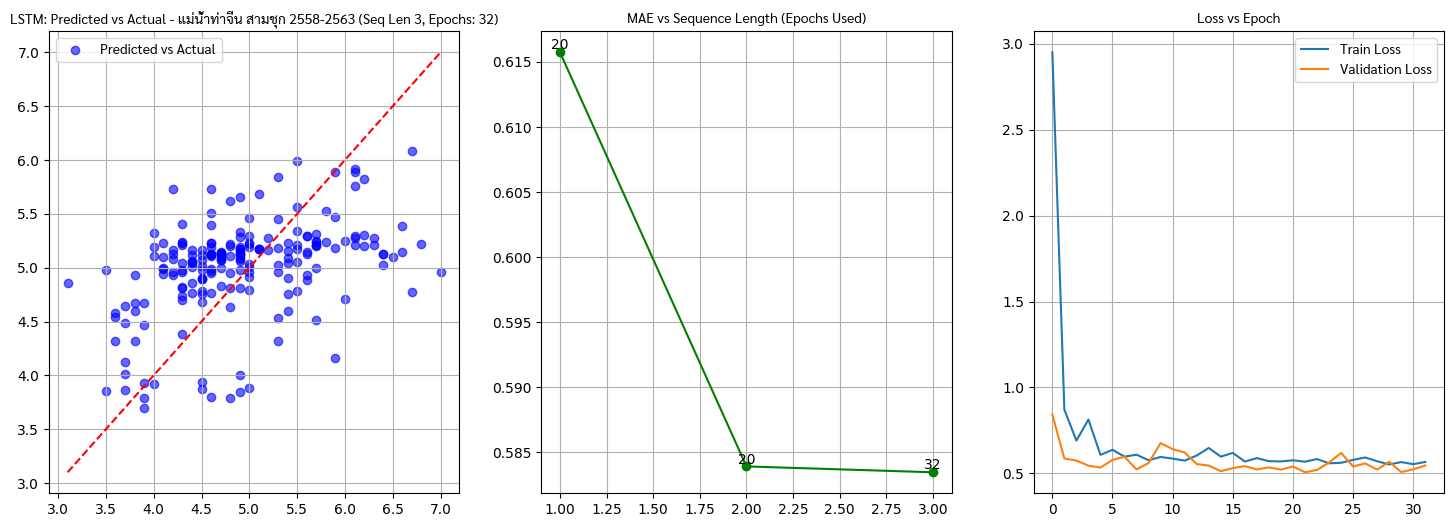

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 5.3806 - mae: 1.7567 - val_loss: 2.2018 - val_mae: 1.2441
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9655 - mae: 1.1250 - val_loss: 2.0379 - val_mae: 1.0111
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9825 - mae: 1.0895 - val_loss: 1.9243 - val_mae: 1.0240
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8376 - mae: 1.0684 - val_loss: 1.8676 - val_mae: 1.0112
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9318 - mae: 1.0958 - val_loss: 2.1148 - val_mae: 1.0270
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9047 - mae: 1.0874 - val_loss: 2.0207 - val_mae: 1.2201
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8642 - mae: 1.0795 - val_loss: 1.8139 - val_mae: 1.0567
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7894 - mae: 1.0453 - val_loss: 1.9110 - val_mae: 1.0300
Epoch 9/100
350/350 ━━━━━━━━━

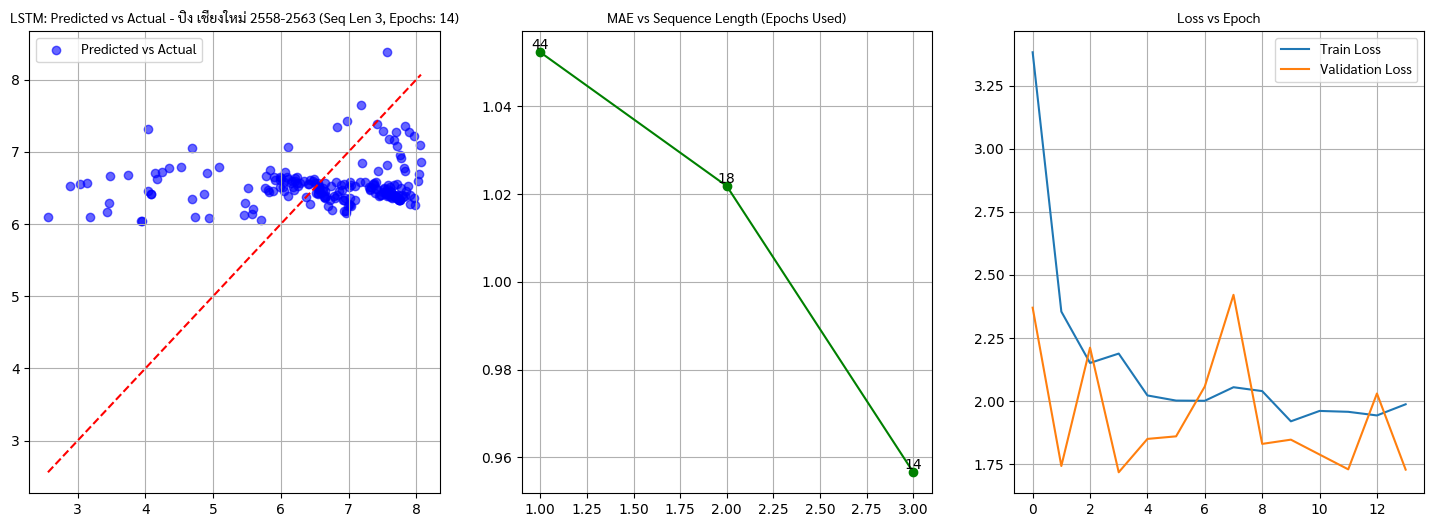

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.8097 - mae: 0.8161 - val_loss: 0.1447 - val_mae: 0.3031
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1906 - mae: 0.3494 - val_loss: 0.1399 - val_mae: 0.2996
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1766 - mae: 0.3367 - val_loss: 0.1683 - val_mae: 0.3321
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1679 - mae: 0.3285 - val_loss: 0.1359 - val_mae: 0.2893
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1475 - mae: 0.2994 - val_loss: 0.1756 - val_mae: 0.3294
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1691 - mae: 0.3299 - val_loss: 0.1164 - val_mae: 0.2656
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1872 - mae: 0.3432 - val_loss: 0.1221 - val_mae: 0.2791
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1644 - mae: 0.3237 - val_loss: 0.1259 - val_mae: 0.2833
Epoch 9/100
350/350 ━━━━━━━━━

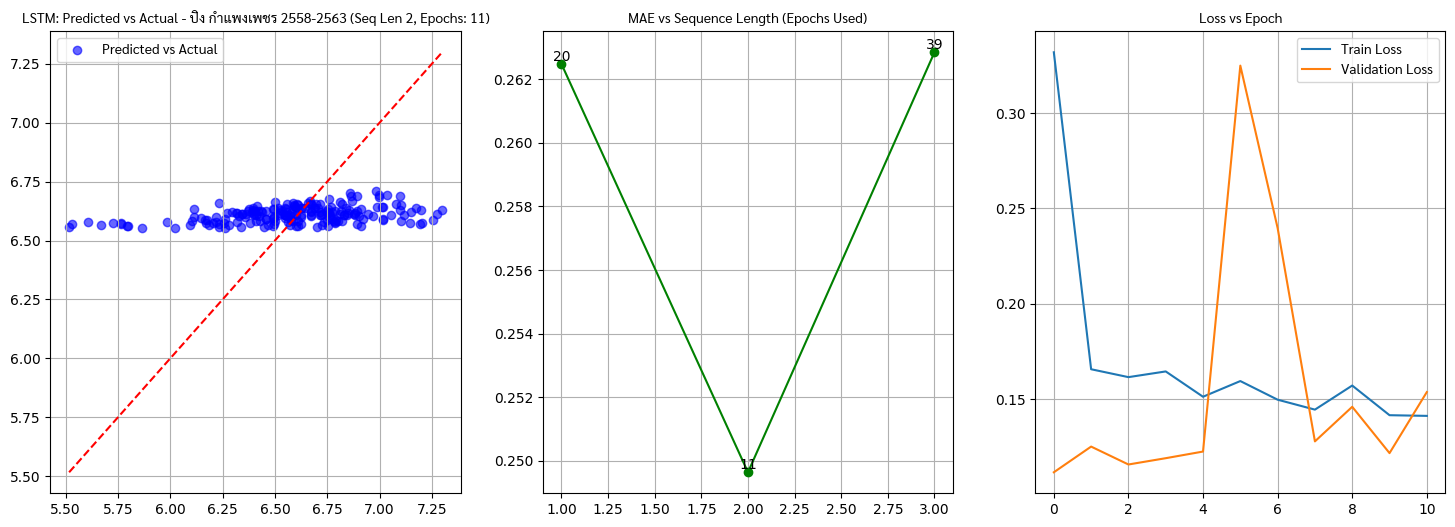

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 8.1316 - mae: 1.5980 - val_loss: 0.1396 - val_mae: 0.2770
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1415 - mae: 0.2887 - val_loss: 0.1314 - val_mae: 0.2680
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1256 - mae: 0.2747 - val_loss: 0.1137 - val_mae: 0.2507
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1223 - mae: 0.2723 - val_loss: 0.1112 - val_mae: 0.2496
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1292 - mae: 0.2708 - val_loss: 0.1253 - val_mae: 0.2804
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1095 - mae: 0.2580 - val_loss: 0.1553 - val_mae: 0.3214
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1121 - mae: 0.2632 - val_loss: 0.1412 - val_mae: 0.2829
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1239 - mae: 0.2714 - val_loss: 0.1227 - val_mae: 0.2766
Epoch 9/100
350/350 ━━━━━━━━━

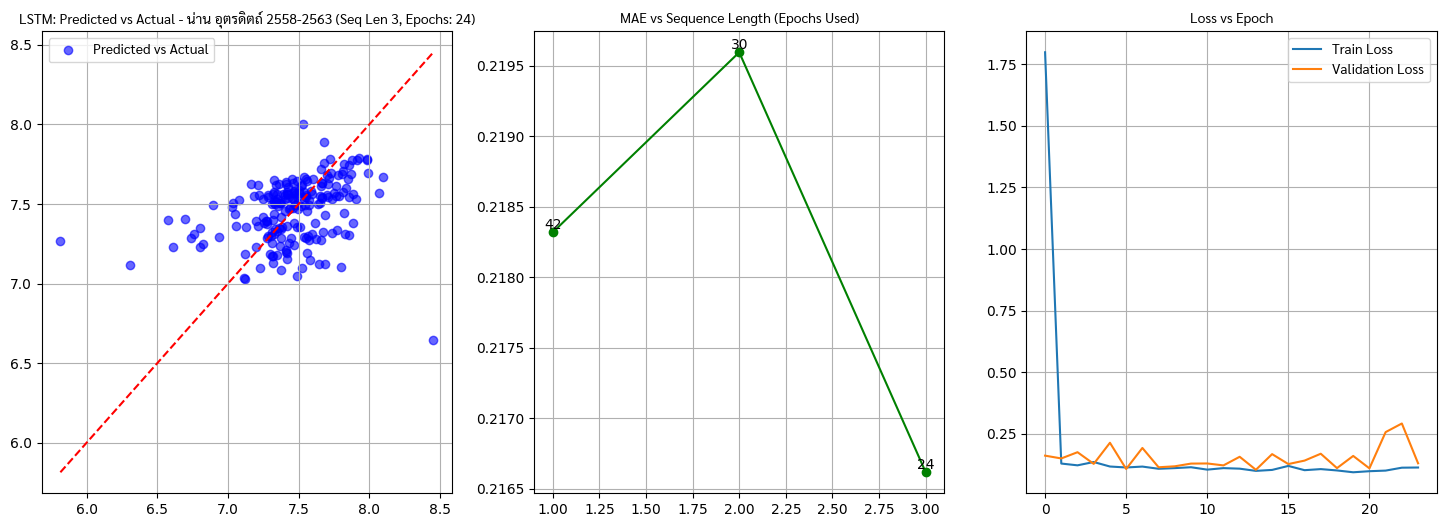

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 2.2414 - mae: 0.9713 - val_loss: 0.3079 - val_mae: 0.4393
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3363 - mae: 0.4795 - val_loss: 0.4313 - val_mae: 0.5215
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3840 - mae: 0.5093 - val_loss: 0.2637 - val_mae: 0.4194
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3372 - mae: 0.4750 - val_loss: 0.2554 - val_mae: 0.4006
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3316 - mae: 0.4720 - val_loss: 0.2744 - val_mae: 0.4223
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3048 - mae: 0.4482 - val_loss: 0.2612 - val_mae: 0.4021
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2961 - mae: 0.4409 - val_loss: 0.3258 - val_mae: 0.4545
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3149 - mae: 0.4523 - val_loss: 0.2893 - val_mae: 0.4412
Epoch 9/100
350/350 ━━━━━━━━━

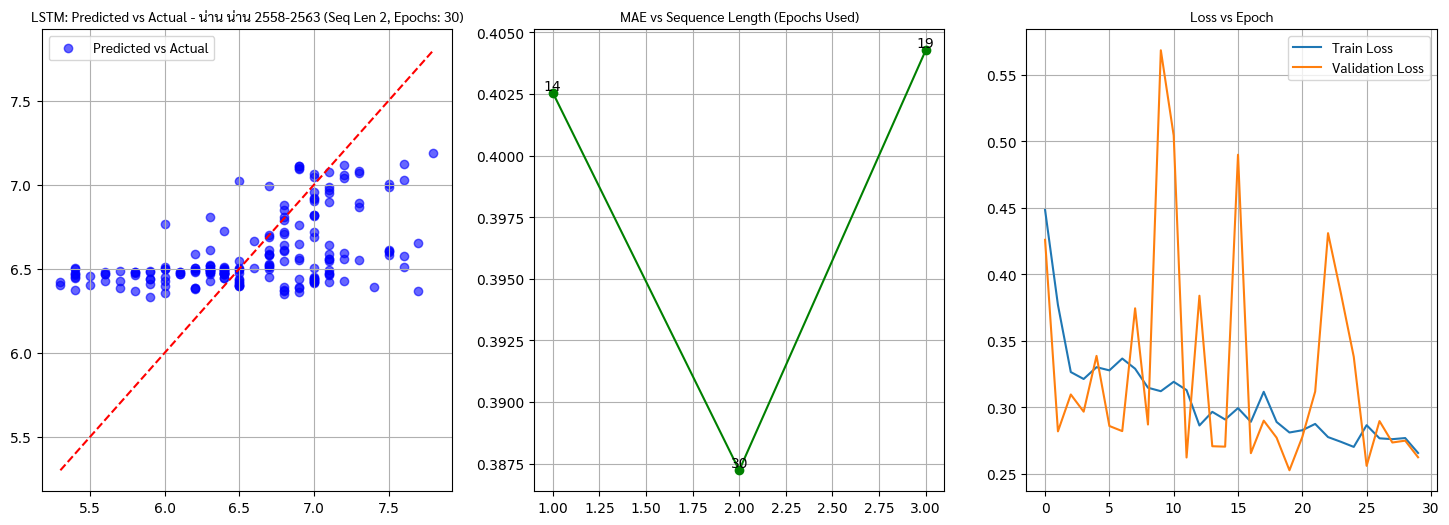

Sequence Length: 1
Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 17.0117 - mae: 2.4929 - val_loss: 0.1658 - val_mae: 0.3143
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2127 - mae: 0.3725 - val_loss: 0.1825 - val_mae: 0.3257
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2112 - mae: 0.3613 - val_loss: 0.2411 - val_mae: 0.3699
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2152 - mae: 0.3736 - val_loss: 0.3195 - val_mae: 0.4636
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2189 - mae: 0.3693 - val_loss: 0.1531 - val_mae: 0.3068
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2155 - mae: 0.3706 - val_loss: 0.3615 - val_mae: 0.5037
Epoch 7/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2146 - mae: 0.3706 - val_loss: 0.2128 - val_mae: 0.3745
Epoch 8/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2340 - mae: 0.3906 - val_loss: 0.1702 - val_mae: 0.3187
Epoch 9/100
350/350 ━━━━━━━━

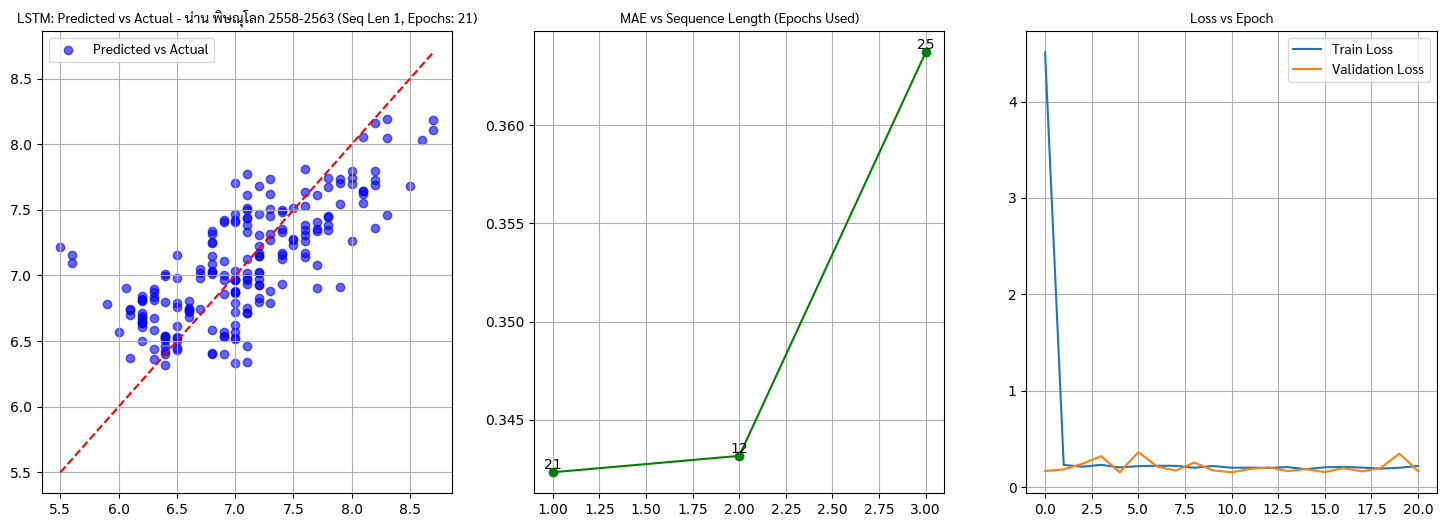

In [6]:
for station, dataset in datasets.items():
    seq_results = []

    for seq_len in range(1, 4):
        print(f"Sequence Length: {seq_len}")
        X, y = create_sequences(dataset.X, dataset.y, seq_len)
        X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=TRAIN_RATIO, random_state=RANDOM_STATE)
        X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_RATIO / (TEST_RATIO + VAL_RATIO), random_state=RANDOM_STATE)

        model = models.Sequential([
            layers.Input(shape=(seq_len, 3)),
            layers.LSTM(64, activation="relu", return_sequences=True),
            layers.LSTM(32, activation="relu"),
            layers.Dense(1)
        ])

        model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])
        history = model.fit(
            X_train, y_train, 
            epochs=100,
            batch_size=4,
            validation_data=(X_val, y_val),
            callbacks=[callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)]
        )

        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)

        seq_results.append((seq_len, mae, model, y_test, y_pred, history))

    best_len, best_mae, best_model, best_y_test, best_y_pred, best_history = min(seq_results, key=lambda x: x[1])
    best_epochs = len(best_history.history["loss"])

    mae = mean_absolute_error(best_y_test, best_y_pred)
    mse = mean_squared_error(best_y_test, best_y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(best_y_test, best_y_pred)

    best_model.save(OUTPUT_PATH / f"{station}_model.keras")
    results.append({
        "station": station,
        "seq_len": best_len,
        "epochs": best_epochs,
        "mae": best_mae,
        "mse": mse,
        "rmse": rmse,
        "r2": r2
    })

    print(f"Station: {station}")
    print(f"Best Sequence Length: {best_len} (Epochs: {best_epochs})")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
    print(f"R^2 Score: {r2:.4f}")

    fig, ax = plt.subplots(1, 3, figsize=(18, 6))

    ax[0].scatter(best_y_test, best_y_pred, color="blue", alpha=0.6, label="Predicted vs Actual")
    ax[0].plot([min(best_y_test), max(best_y_test)], [min(best_y_test), max(best_y_test)], "r--")
    ax[0].set_title(f"LSTM: Predicted vs Actual - {station} (Seq Len {best_len}, Epochs: {best_epochs})", fontproperties=font_prop)
    ax[0].legend(prop=font_prop)
    ax[0].grid()

    seq_lens, maes, _, _, _, histories = zip(*seq_results)
    epochs_used = [len(h.history["loss"]) for h in histories]

    ax[1].plot(seq_lens, maes, marker="o", linestyle="-", color="green")
    for i, (seq_len, mae, epoch) in enumerate(zip(seq_lens, maes, epochs_used)):
        ax[1].text(seq_len, mae, f"{epoch}", ha="center", va="bottom", fontsize=10)
    ax[1].set_title("MAE vs Sequence Length (Epochs Used)", fontproperties=font_prop)
    ax[1].grid()

    ax[2].plot(best_history.history["loss"], label="Train Loss")
    ax[2].plot(best_history.history["val_loss"], label="Validation Loss")
    ax[2].set_title("Loss vs Epoch", fontproperties=font_prop)
    ax[2].legend(prop=font_prop)
    ax[2].grid()

    plt.savefig(OUTPUT_PATH / f"lstm-pred-actual-{station}.png")
    plt.show()


In [7]:
results_df = DataFrame(results)
results_df.to_csv(OUTPUT_PATH / "results.csv", index=False)